### Initialize the environment

In [54]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [56]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [57]:
run=1
date_time='2017-02-20_2356' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [58]:
config

{u'dbns': {u'GE': {u'batchSize': 5,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 5,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [2],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 5,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 5,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'7c7257ed

### Load the dataset and visualize the input of the pathways

In [59]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [60]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

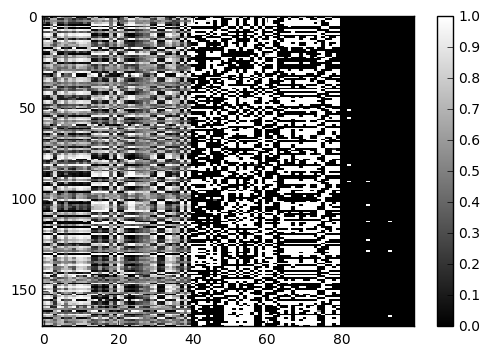

In [61]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [62]:
joint_layer[1:10,1:10]

array([[  9.83248800e-02,   6.77686155e-01,   7.09133267e-01,
          1.64006874e-01,   1.48860171e-01,   4.90403593e-01,
          3.46475214e-01,   1.22102931e-01,   3.22602481e-01],
       [  4.51784253e-01,   5.73298395e-01,   5.63820064e-01,
          4.57452446e-01,   4.28487301e-01,   6.01450503e-01,
          3.69783849e-01,   3.04108739e-01,   4.70147491e-01],
       [  9.99969915e-02,   5.36830246e-01,   7.32604504e-01,
          1.67926550e-01,   1.80966809e-01,   4.48304057e-01,
          1.85700744e-01,   1.87004507e-01,   1.97421223e-01],
       [  3.62812495e-03,   3.54198694e-01,   9.35024977e-01,
          1.58699192e-02,   3.92522058e-03,   2.29994789e-01,
          3.05049215e-02,   9.57698189e-03,   2.61231177e-02],
       [  9.71569359e-01,   8.83869767e-01,   1.24963813e-01,
          8.71673822e-01,   9.57207620e-01,   7.69254863e-01,
          8.01914632e-01,   7.30950058e-01,   9.29026663e-01],
       [  9.61827580e-04,   6.55556083e-01,   9.92435634e-01,
   

### Check the weights distributions

([array([  0.00000000e+00,   7.00000000e+00,   2.53000000e+02,
           2.38700000e+03,   6.83200000e+03,   7.27000000e+03,
           2.80500000e+03,   3.70000000e+02,   1.30000000e+01,
           0.00000000e+00]),
  array([    0.,    23.,   374.,  2739.,  7124.,  6950.,  2374.,   337.,
            16.,     0.]),
  array([    0.,    15.,   295.,  2264.,  6843.,  7346.,  2777.,   371.,
            26.,     0.]),
  array([  1.00000000e+00,   1.40000000e+01,   3.51000000e+02,
           2.53000000e+03,   7.11700000e+03,   6.92600000e+03,
           2.63100000e+03,   3.53000000e+02,   1.40000000e+01,
           0.00000000e+00]),
  array([  0.00000000e+00,   2.30000000e+01,   3.90000000e+02,
           2.85200000e+03,   7.30900000e+03,   6.64200000e+03,
           2.40700000e+03,   2.96000000e+02,   1.70000000e+01,
           1.00000000e+00]),
  array([  1.00000000e+00,   1.60000000e+01,   3.55000000e+02,
           2.51200000e+03,   6.99600000e+03,   7.06100000e+03,
           2.6530000

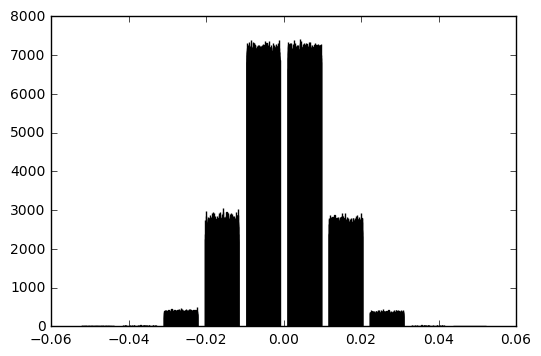

In [63]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x1463dab50>,
 <a list of 3 Text xticklabel objects>)

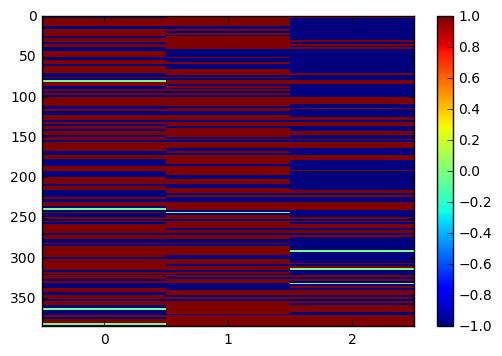

In [64]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x146e07590>,
 <a list of 3 Text xticklabel objects>)

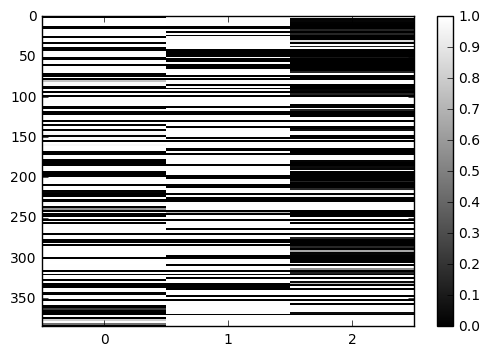

In [65]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 69.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,   1.,  96.]),
  array([  59.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,  110.]),
  array([ 96.,  11.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,  59.])],
 array([  2.47583655e-37,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

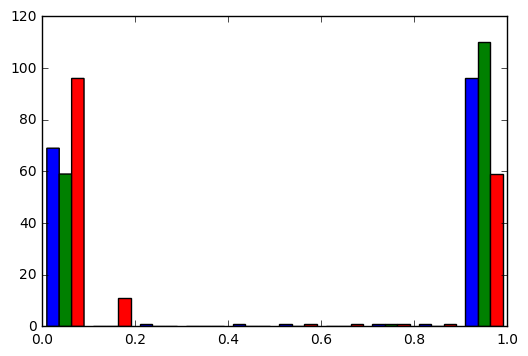

In [66]:
plt.hist(top_output)

In [67]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [68]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 35.,   2.,  14.,  20.,  22.,  36.,  41.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

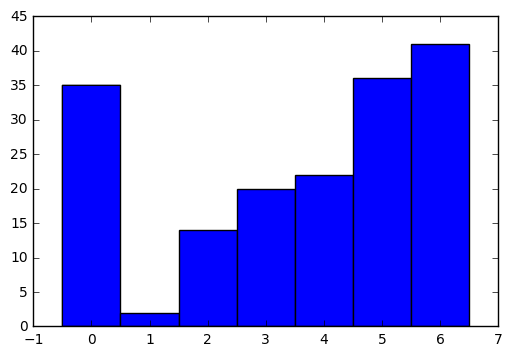

In [69]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [70]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [71]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [72]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


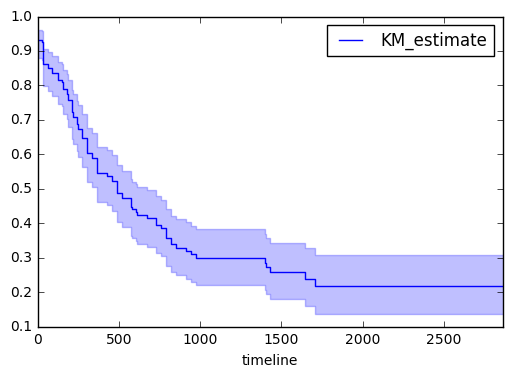

In [73]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

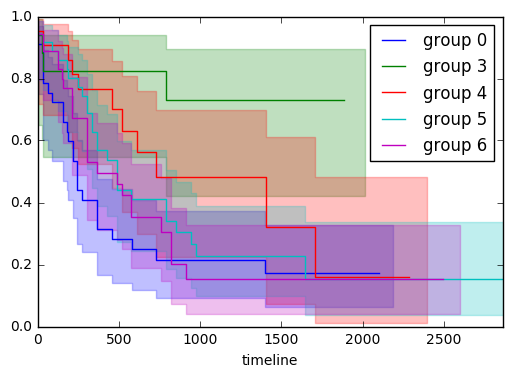

In [75]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [3,4,5,6]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)